<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/callbacks_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [78]:
(train, test), metadata = tfds.load('mnist',
                                    as_supervised=True,
                                    with_info=True,
                                    split=['train', 'test'])

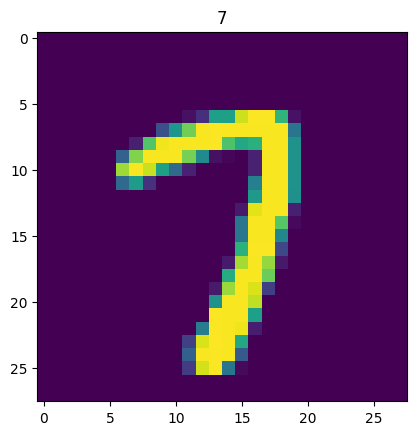

In [66]:
for x,y in train.skip(12).take(1):

     plt.title(str(y.numpy()))
     plt.imshow(x)

In [67]:
x.shape

TensorShape([28, 28, 1])

In [68]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [79]:
train = train.shuffle(1000).batch(32).prefetch(1)
test = test.batch(32).prefetch(1)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(2),
    #keras.layers.Dropout(.2),

    keras.layers.Conv2D(64, (3, 3), activation='relu',),
    keras.layers.MaxPool2D(2),
    #keras.layers.Dropout(.2),


    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')

])

In [70]:
''' 
  Callback to save the Keras model or model weights at some frequency
  save_freq='epoch' - each epoch
'''
MC = keras.callbacks.ModelCheckpoint(
    './content/drive/MyDrive/Colab Notebooks/Sertificate_preparation/Books/Callbacks/Models/mnist_h5.h5',
    monitor='val_loss',
    save_best_only='True',
    verbose=1
)

'''
It will interrupt training when it measures no progress on the validation set for
a number of epochs (defined by the patience argument), and it will optionally roll
back to the best model.
'''
ES = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights='True'
)

'''
At the beginning of every epoch, this callback gets the updated learning rate value from schedule function provided at __init__, 
with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.
'''
LR = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch/2), verbose=1)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(learning_rate=1e-5))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [71]:
model.layers[0].input_shape

(None, 28, 28, 1)

In [72]:
model.fit(
    train,
    validation_data=test,
    callbacks=[ES, MC],
    epochs=4
)

Epoch 1/4
1875/1875 [==============================] - ETA: 0s - loss: 3.2125 - accuracy: 0.6965
Epoch 1: val_loss improved from inf to 0.76875, saving model to ./content/drive/MyDrive/Colab Notebooks/Sertificate_preparation/Books/Callbacks/Models/mnist_h5.h5
1875/1875 [==============================] - 83s 44ms/step - loss: 3.2125 - accuracy: 0.6965 - val_loss: 0.7687 - val_accuracy: 0.8693
Epoch 2/4
1874/1875 [============================>.] - ETA: 0s - loss: 0.6247 - accuracy: 0.8902
Epoch 2: val_loss improved from 0.76875 to 0.43141, saving model to ./content/drive/MyDrive/Colab Notebooks/Sertificate_preparation/Books/Callbacks/Models/mnist_h5.h5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.6248 - accuracy: 0.8902 - val_loss: 0.4314 - val_accuracy: 0.9201
Epoch 3/4
1874/1875 [============================>.] - ETA: 0s - loss: 0.4005 - accuracy: 0.9238
Epoch 3: val_loss improved from 0.43141 to 0.32154, saving model to ./content/drive/MyDrive/Colab Notebooks/S

In [73]:
root_logdir = '/content/drive/MyDrive/Colab Notebooks/Sertificate_preparation/Books/Callbacks/Logs'

In [75]:
import os

In [76]:
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)

In [77]:
run_logdir = get_run_logdir() 
run_logdir

'/content/drive/MyDrive/Colab Notebooks/Sertificate_preparation/Books/Callbacks/Logs/run_2023_06_13-02_47_42'

In [81]:
TB = keras.callbacks.TensorBoard(run_logdir)


model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(learning_rate=1e-5))

history = model.fit(
    train,
    validation_data=test,
    callbacks=[TB],
    epochs=4
)

Epoch 1/4
1875/1875 [==============================] - 87s 46ms/step - loss: 2.5792 - accuracy: 0.6899 - val_loss: 0.7083 - val_accuracy: 0.8650
Epoch 2/4
1875/1875 [==============================] - 75s 40ms/step - loss: 0.5248 - accuracy: 0.8926 - val_loss: 0.4177 - val_accuracy: 0.9129
Epoch 3/4
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3336 - accuracy: 0.9262 - val_loss: 0.3159 - val_accuracy: 0.9303
Epoch 4/4
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2411 - accuracy: 0.9439 - val_loss: 0.2511 - val_accuracy: 0.9432


In [96]:
logs = '/content/drive/MyDrive/Colab Notebooks/Sertificate_preparation/Books/Callbacks/Logs/'

In [97]:
%load_ext tensorboard

In [98]:
%tensorboard --logdir logs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-06-13 03:02:47.361998: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the s